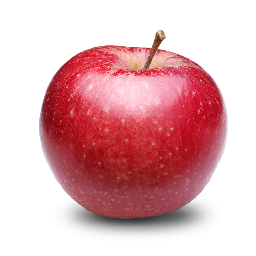

In [1]:
import torch
from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image

def alpha_composite(fg, bg, mask):
    mask = mask.unsqueeze(1)
    return fg * mask + bg * (1. - mask)

to_tensor = ToTensor()
to_img = ToPILImage()

img = Image.open('apple.png').resize((256, 256))
img

In [2]:
x = to_tensor(img).unsqueeze(0)
x.size()

torch.Size([1, 4, 256, 256])

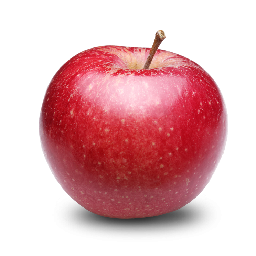

In [3]:
x1 = alpha_composite(x[:,:3], 1., x[:,3])
to_img(x1[0])

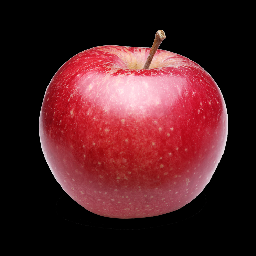

In [4]:
x2 = alpha_composite(x[:,:3], 0., x[:,3])
to_img(x2[0])

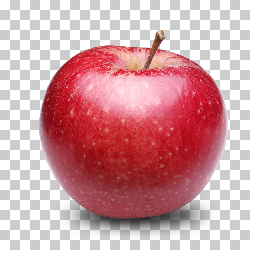

In [5]:
H, W = x1.size(2), x1.size(3)
bg = torch.ones_like(x1[:,:3])
for i in range(0, H//10):
    for j in range(0, W//10):
        if i % 2 == 0:
            if j % 2 == 1:
                bg[:,:,i*10:(i+1)*10,j*10:(j+1)*10] = 0.8
        if i % 2 == 1:
            if j % 2 == 0:
                bg[:,:,i*10:(i+1)*10,j*10:(j+1)*10] = 0.8
x3 = alpha_composite(x[:,:3], bg, x[:,3])
to_img(x3[0])

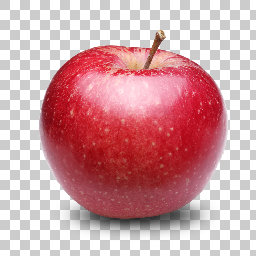

In [6]:
value = .8; grid_size = 10
H, W = x1.size(2), x1.size(3)
white = torch.ones((H, W), requires_grad=False)
gray = white * value
yy, xx = torch.meshgrid(torch.arange(H), torch.arange(W))
cond_a = (yy // grid_size % 2 == 0) & (xx // grid_size % 2 == 1)
cond_b = (yy // grid_size % 2 == 1) & (xx // grid_size % 2 == 0)
bg = torch.where(cond_a | cond_b, white, gray)
bg = bg.unsqueeze(0).unsqueeze(0).expand_as(x[:,:3])
x3 = alpha_composite(x[:,:3], bg, x[:,3])
to_img(x3[0])